### 📌 주식 시장 예측 프로젝트 개요
주식 시장 예측(Stock Price Prediction)은 과거 주가 데이터를 분석하여 미래의 주가를 예측하는 작업입니다.
전통적인 분석 방법뿐만 아니라, 머신러닝 및 딥러닝을 활용하여 보다 정교한 모델을 구축할 수 있습니다.

✅ 1. 프로젝트 목표
과거 주가 데이터를 분석하여 패턴을 발견하고 미래 주가를 예측
주식 시장의 변동성(Volatility)과 추세(Trend) 를 분석
머신러닝(XGBoost, Random Forest) 및 딥러닝(LSTM)을 활용한 가격 예측 모델 구축
기술적 지표(이동평균선, RSI 등)를 활용한 투자 전략 분석

### ✅ 2. 데이터 수집

In [3]:
pip install yfinance xgboost tensorflow keras scikit-learn matplotlib seaborn

  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 5.7 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
  Created wheel for peewee: filename=peewee-3.17.9-cp313-cp313-macosx_14_0_x86_64.whl size=280412 sha256=880163cfcb6264b455dcebf1e47ad5b31582357ec59df0e724080634640ac5f2
  Stored in directory: /Users/naeun/Library/Caches/pip/wheels/a4/4c/13/c0145c208d813977081d42e2a47d72acb3efc4a6965ab57804
Successfully built peewee

[notice] A new release of pip is available

In [1]:
import yfinance as yf

# 테슬라 주식 데이터 가져오기
ticker = "TSLA"
df = yf.download(ticker, start="2024-12-11", end="2025-01-01")

# 데이터 확인
print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2024-12-11  424.769989  424.880005  402.380005  409.700012  104287600
2024-12-12  418.100006  429.299988  415.000000  424.839996   87752200
2024-12-13  436.230011  436.299988  415.709991  420.000000   89000200
2024-12-16  463.019989  463.190002  436.149994  441.089996  114083800
2024-12-17  479.859985  483.989990  457.510010  475.899994  131223000


### ✅ 3. 데이터 전처리 (Feature Engineering)
주식 예측을 위해 기술적 지표(Technical Indicators) 를 추가합니다.

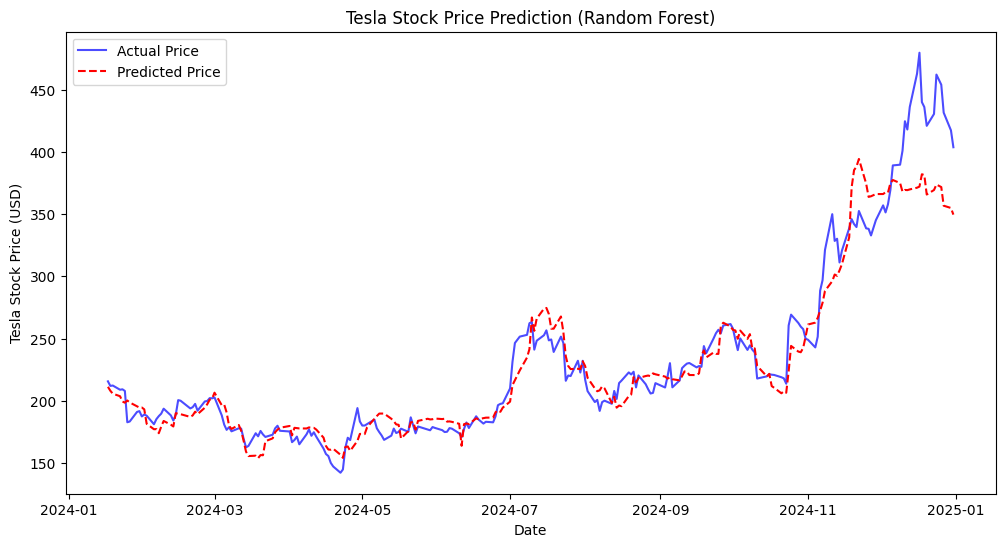

In [50]:
# 📌 10. 예측 vs 실제 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color="blue", alpha=0.7)
plt.plot(y_test.index, y_pred, label="Predicted Price", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Tesla Stock Price (USD)")
plt.title("Tesla Stock Price Prediction (Random Forest)")
plt.legend()
plt.show()

# ==== 테슬라(TSLA) -> XGBoost, LSTM(딥러닝), GridSearchCV =======

### ✅ 1. 특성 엔지니어링 추가
기존 이동평균(MA), RSI, 변동성 외에 MACD, 볼린저 밴드, 거래량 데이터 추가.

### ✅ 2. 모델 추가 및 비교
랜덤 포레스트 (기본 비교 모델)
XGBoost (트리 기반 머신러닝)
LSTM (딥러닝 기반 순환 신경망)
### ✅ 3. 하이퍼파라미터 튜닝
GridSearchCV를 사용하여 RandomForest와 XGBoost 최적화

In [10]:
pip install yfinance matplotlib seaborn scikit-learn MinMaxScaler XGBboost

ERROR: Could not find a version that satisfies the requirement MinMaxScaler (from versions: none)
ERROR: No matching distribution found for MinMaxScaler
Note: you may need to restart the kernel to use updated packages.


## 📌 1. 데이터 로드 및 기술적 지표 추가

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 📌 1. 테슬라(TSLA) 주가 데이터 가져오기
ticker = "TSLA"
df = yf.download(ticker, start="2024-12-11", end="2025-01-01")

# 📌 2. 기술적 지표 추가
df["MA_10"] = df["Close"].rolling(window=10).mean()  # 10일 이동평균
df["MA_50"] = df["Close"].rolling(window=50).mean()  # 50일 이동평균
df["Volatility"] = df["Close"].pct_change().rolling(window=10).std()  # 변동성

# MACD 계산
df["EMA_12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["EMA_26"] = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["EMA_12"] - df["EMA_26"]

# 볼린저 밴드 계산
df["Rolling_STD"] = df["Close"].rolling(window=10).std()  # 표준편차 계산 후 별도 저장
df["Upper_Band"] = df["MA_10"] + (df["Rolling_STD"].values.flatten() * 2)
df["Lower_Band"] = df["MA_10"] - (df["Rolling_STD"].values.flatten() * 2)

# 거래량을 로그 스케일로 변환
df["Volume_log"] = np.log(df["Volume"] + 1)

# 결측값 제거
df.dropna(inplace=True)

# 특성 선택
features = ["MA_10", "MA_50", "Volatility", "MACD", "Upper_Band", "Lower_Band", "Volume_log"]
X = df[features]
y = df["Close"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("✅ 데이터 준비 완료")


[*********************100%***********************]  1 of 1 completed

✅ 데이터 준비 완료


## 📌 2. 랜덤 포레스트 & XGBoost 모델 적용

/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


📌 Random Forest RMSE: 20.71, R² Score: 0.9179
📌 XGBoost RMSE: 21.50, R² Score: 0.9115


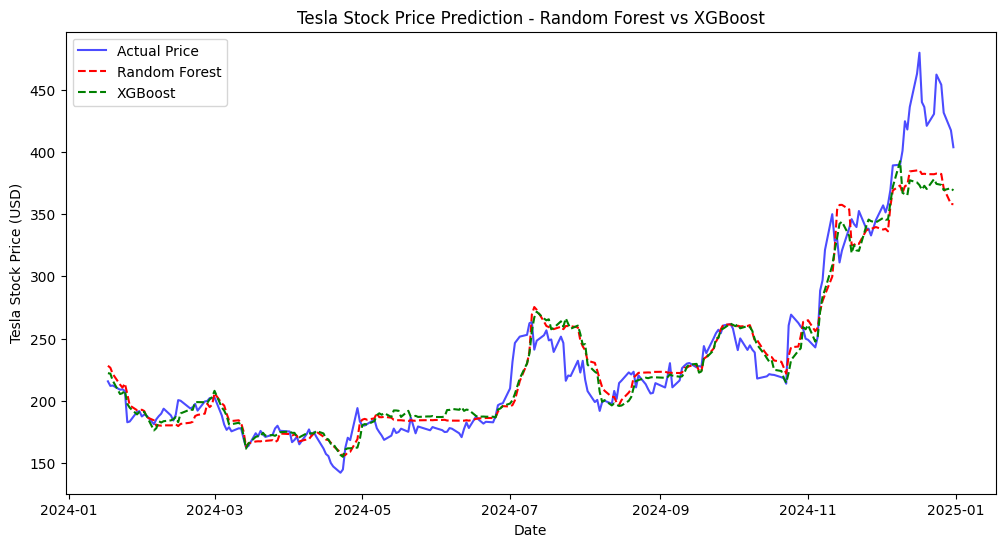

In [4]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# 📌 최적 파라미터: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

# 📌 랜덤 포레스트 모델
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10,min_samples_split=5 )
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# 📌 XGBoost 모델
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# 📌 성능 평가
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"📌 {model_name} RMSE: {rmse:.2f}, R² Score: {r2:.4f}")

evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, xgb_pred, "XGBoost")

# 📌 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color="blue", alpha=0.7)
plt.plot(y_test.index, rf_pred, label="Random Forest", color="red", linestyle="dashed")
plt.plot(y_test.index, xgb_pred, label="XGBoost", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Tesla Stock Price (USD)")
plt.title("Tesla Stock Price Prediction - Random Forest vs XGBoost")
plt.legend()
plt.show()


## 📌 3. LSTM (딥러닝) 적용

2025-03-12 16:37:43.018264: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,851 (124.42 KB)

 Trainable params: 31,851 (124.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0919 - val_loss: 0.0063
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - val_loss: 0.0047
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - val_loss: 0.0033
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - val_loss: 0.0048
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0047 - val_loss: 0.0033
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - val_loss: 0.0029
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - val

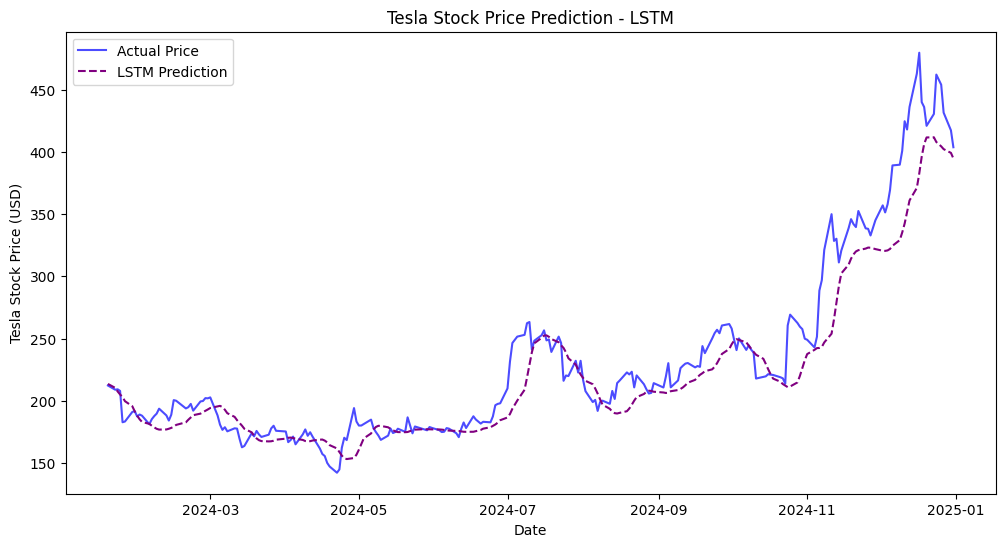

In [5]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 📌 데이터 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# 📌 시퀀스 데이터 생성 (LSTM 입력 형태: (samples, time steps, features))
def create_sequences(data, target, window_size):
    Xs, ys = [], []
    for i in range(len(data) - window_size):
        Xs.append(data[i : i + window_size])
        ys.append(target[i + window_size])
    return np.array(Xs), np.array(ys)

window_size = 10  # 10일 단위 시퀀스
X_lstm, y_lstm = create_sequences(X_scaled, y_scaled, window_size)

# 📌 훈련/테스트 분할
split = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# 📌 LSTM 모델 구축
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.summary()

# 📌 모델 훈련
history = model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=16, validation_data=(X_test_lstm, y_test_lstm), verbose=1)

# 📌 예측
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

# 📌 LSTM 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test.index[-len(y_pred_lstm):], y_test[-len(y_pred_lstm):], label="Actual Price", color="blue", alpha=0.7)
plt.plot(y_test.index[-len(y_pred_lstm):], y_pred_lstm, label="LSTM Prediction", color="purple", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Tesla Stock Price (USD)")
plt.title("Tesla Stock Price Prediction - LSTM")
plt.legend()
plt.show()


## 📌 4. GridSearchCV를 활용한 Hyperparameter Tuning

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring="neg_mean_squared_error", verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"📌 최적 파라미터: {grid_search.best_params_}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.11/site-packages/sklearn/base.py:1389:

📌 최적 파라미터: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


# LSTM 모델에 ChatGPT 기반 뉴스 헤드라인 감성 분석을 적용하는 방법
## 네이버 뉴스 크롤링(최근 30일)

In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import time

def get_naver_news(keyword, days=30, max_pages=3):
    """ 네이버 뉴스에서 특정 키워드(예: 테슬라)로 30일치 뉴스 크롤링 """
    base_url = "https://search.naver.com/search.naver"
    
    news_list = []
    today = datetime.datetime.today()
    
    for i in range(days):
        search_date = (today - datetime.timedelta(days=i)).strftime("%Y.%m.%d")
        for page in range(1, max_pages + 1):  # 페이지 수 제한
            params = {
                "where": "news",
                "query": keyword,
                "sort": "1",  # 최신순 정렬
                "start": (page - 1) * 10 + 1,  # 페이지네이션
                "ds": search_date,
                "de": search_date,
            }

            response = requests.get(base_url, params=params)
            soup = BeautifulSoup(response.text, "html.parser")
            
            # 뉴스 제목 가져오기
            news_titles = soup.select("a.news_tit")

            for title in news_titles:
                news_list.append({"date": search_date, "headline": title.text})

        time.sleep(1)  # 크롤링 예절 지키기 (서버 부하 방지)

    return pd.DataFrame(news_list)

# 🔹 뉴스 크롤링 실행 (테슬라 관련 뉴스)
df_news = get_naver_news("테슬라", days=30)
print(df_news.head())  # 뉴스 데이터 확인


         date                                        headline
0  2025.03.12                           [필동정담] NASA국장과 구로구청장 
1  2025.03.12     FT "트럼프, 머스크와의 결별은 시간문제···곁에 두기엔 정치적 부담... 
2  2025.03.12       트럼프, 주가 폭락한 테슬라 시승…"머스크, 1억불 기부로 화답"(종합) 
3  2025.03.12  찬 바람 속 희소식 든 양극재…IRA 변동성이 '수주 릴레이' 변수로 [소부... 
4  2025.03.12            "중국도 20조 넣는다"…투자확대 기대감에 로봇주 강세[핫종목] 


In [56]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      900 non-null    object
 1   headline  900 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB


## ✅ 2. 감성 분석 (VADER & FinBERT 활용)

### 🔹 방법 1: VADER (NLTK) 활용

In [31]:
pip install nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [57]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# 🔹 VADER 감성 분석기 다운로드 (한 번만 실행)
nltk.download("vader_lexicon")

# 🔹 VADER 감성 분석 적용
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    """VADER를 사용한 감성 점수 계산"""
    sentiment_score = sia.polarity_scores(text)["compound"]
    if sentiment_score >= 0.05:
        return 1  # 긍정
    elif sentiment_score <= -0.05:
        return -1  # 부정
    else:
        return 0  # 중립

# 🔹 뉴스 데이터에 감성 점수 적용
df_news["sentiment_vader"] = df_news["headline"].apply(get_vader_sentiment)
print(df_news.head())


         date                                        headline  sentiment_vader
0  2025.03.12                           [필동정담] NASA국장과 구로구청장                 0
1  2025.03.12     FT "트럼프, 머스크와의 결별은 시간문제···곁에 두기엔 정치적 부담...                 0
2  2025.03.12       트럼프, 주가 폭락한 테슬라 시승…"머스크, 1억불 기부로 화답"(종합)                 0
3  2025.03.12  찬 바람 속 희소식 든 양극재…IRA 변동성이 '수주 릴레이' 변수로 [소부...                 0
4  2025.03.12            "중국도 20조 넣는다"…투자확대 기대감에 로봇주 강세[핫종목]                 0


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/naeun/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### 🔹 방법 2: FinBERT 활용 (금융 뉴스에 특화된 감성 분석)

In [58]:
from transformers import pipeline

# 🔹 FinBERT 감성 분석 모델 로드
sentiment_pipeline = pipeline("sentiment-analysis", model="ProsusAI/finbert")

def get_finbert_sentiment(text):
    """FinBERT를 사용한 감성 분석"""
    result = sentiment_pipeline(text)
    label = result[0]["label"]
    if label == "positive":
        return 1  # 긍정
    elif label == "negative":
        return -1  # 부정
    else:
        return 0  # 중립

# 🔹 FinBERT 감성 분석 적용
df_news["sentiment_finbert"] = df_news["headline"].apply(get_finbert_sentiment)
print(df_news.head())

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use 0


         date                                        headline  \
0  2025.03.12                           [필동정담] NASA국장과 구로구청장    
1  2025.03.12     FT "트럼프, 머스크와의 결별은 시간문제···곁에 두기엔 정치적 부담...    
2  2025.03.12       트럼프, 주가 폭락한 테슬라 시승…"머스크, 1억불 기부로 화답"(종합)    
3  2025.03.12  찬 바람 속 희소식 든 양극재…IRA 변동성이 '수주 릴레이' 변수로 [소부...    
4  2025.03.12            "중국도 20조 넣는다"…투자확대 기대감에 로봇주 강세[핫종목]    

   sentiment_vader  sentiment_finbert  
0                0                  0  
1                0                 -1  
2                0                 -1  
3                0                  0  
4                0                  0  


## ✅ 3. 감성 분석 결과 병합 및 저장

In [59]:
# 🔹 감성 점수 평균화 (VADER & FinBERT 병합)
df_news["sentiment"] = (df_news["sentiment_vader"] + df_news["sentiment_finbert"]) / 2

# 🔹 감성 점수 저장
df_news.to_csv("tesla_news_sentiment.csv", index=False)
print("✅ 감성 분석 결과 저장 완료!")

✅ 감성 분석 결과 저장 완료!


## ✅ 2. 기존 데이터셋에 감성 점수 추가

In [4]:
df_news = pd.read_csv("tesla_news_sentiment.csv")
df_news['date'].unique()

array(['2025.03.12', '2025.03.11', '2025.03.10', '2025.03.09',
       '2025.03.08', '2025.03.07', '2025.03.06', '2025.03.05',
       '2025.03.04', '2025.03.03', '2025.03.02', '2025.03.01',
       '2025.02.28', '2025.02.27', '2025.02.26', '2025.02.25',
       '2025.02.24', '2025.02.23', '2025.02.22', '2025.02.21',
       '2025.02.20', '2025.02.19', '2025.02.18', '2025.02.17',
       '2025.02.16', '2025.02.15', '2025.02.14', '2025.02.13',
       '2025.02.12', '2025.02.11'], dtype=object)

In [106]:
import yfinance as yf

# 테슬라 주식 데이터 가져오기
ticker = "TSLA"
df_stock = yf.download(ticker, start="2025-02-11", end="2025-03-12")

# 데이터 확인
print(df_stock.head())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2025-02-11  328.500000  349.369995  325.100006  345.799988  118543400
2025-02-12  336.510010  346.399994  329.119995  329.940002  105382700
2025-02-13  355.940002  358.690002  342.850006  345.000000   89441500
2025-02-14  355.839996  362.000000  347.500000  360.619995   68277300
2025-02-18  354.109985  359.100006  350.019989  355.010010   51631700


In [107]:
df_stock.columns.get_level_values(1)

Index(['TSLA', 'TSLA', 'TSLA', 'TSLA', 'TSLA'], dtype='object', name='Ticker')

In [108]:
# 🔹 컬럼의 MultiIndex 구조를 단순화하여 첫 번째 레벨만 남김
df_stock.columns = df_stock.columns.get_level_values(0)
df_stock = df_stock.reset_index()

In [109]:
print(df_stock.columns)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [110]:
df_stock.head()

Price,Date,Close,High,Low,Open,Volume
0,2025-02-11,328.500000,349.369995,325.100006,345.799988,118543400
1,2025-02-12,336.510010,346.399994,329.119995,329.940002,105382700
2,2025-02-13,355.940002,358.690002,342.850006,345.000000,89441500
3,2025-02-14,355.839996,362.000000,347.500000,360.619995,68277300
4,2025-02-18,354.109985,359.100006,350.019989,355.010010,51631700


In [111]:
# 🔹 날짜 포맷 변환
df_news["date"] = pd.to_datetime(df_news["date"], format="%Y.%m.%d")
df_stock["Date"] = pd.to_datetime(df_stock["Date"])

# 🔹 날짜 기준 병합 (left join)
df_stock = df_stock.merge(df_news, left_on="Date", right_on="date", how="left").drop(columns=["date"])

# 🔹 감성 점수 NaN 값 처리 (NaN → 0)
df_stock["sentiment_vader"].fillna(0, inplace=True)
df_stock["sentiment_finbert"].fillna(0, inplace=True)

# ✅ 최종 결과 확인
print(df_stock.head())

        Date  Close        High         Low        Open     Volume  \
0 2025-02-11  328.5  349.369995  325.100006  345.799988  118543400   
1 2025-02-11  328.5  349.369995  325.100006  345.799988  118543400   
2 2025-02-11  328.5  349.369995  325.100006  345.799988  118543400   
3 2025-02-11  328.5  349.369995  325.100006  345.799988  118543400   
4 2025-02-11  328.5  349.369995  325.100006  345.799988  118543400   

                                         headline  sentiment_vader  \
0                           [필동정담] NASA국장과 구로구청장                 0   
1     FT "트럼프, 머스크와의 결별은 시간문제···곁에 두기엔 정치적 부담...                 0   
2       트럼프, 주가 폭락한 테슬라 시승…"머스크, 1억불 기부로 화답"(종합)                 0   
3  찬 바람 속 희소식 든 양극재…IRA 변동성이 '수주 릴레이' 변수로 [소부...                 0   
4            "중국도 20조 넣는다"…투자확대 기대감에 로봇주 강세[핫종목]                 0   

   sentiment_finbert  sentiment  
0                  0        0.0  
1                 -1       -0.5  
2                 -1       -0.5  
3                  0  

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_87166/4089536176.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stock["sentiment_vader"].fillna(0, inplace=True)
/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_87166/4089536176.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

## ✅ 3. 감성 점수를 포함한 특성 엔지니어링

In [113]:
# 🔹 감성 점수 추가한 피처 선택
features = ['Close', 'High', 'Low', 'Open', 'Volume', 'sentiment_vader', 'sentiment_finbert', 'sentiment']

# 🔹 학습 데이터셋 생성
X = df_stock[features]
y = df_stock['Close'].shift(-1)  # 다음날 종가 예측 (LSTM과 XGBoost에서 동일)


## ✅ XGBoost 적용

In [114]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 🔹 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.2, random_state=42)

# 🔹 XGBoost 모델 학습
model_xgb = XGBRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
model_xgb.fit(X_train, y_train)

# 🔹 예측 및 평가
y_pred = model_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"📊 XGBoost 모델 MAE: {mae:.4f}")


📊 XGBoost 모델 MAE: 0.6767


/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:10:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


## ✅ LSTM 모델에 감성분석 변수 추가

In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 🔹 데이터 정규화 (LSTM은 정규화가 중요!)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 LSTM에 입력할 시계열 데이터 만들기
def create_sequences(data, target, seq_length=10):
    Xs, ys = [], []
    for i in range(len(data) - seq_length):
        Xs.append(data[i:i+seq_length])
        ys.append(target[i+seq_length])
    return np.array(Xs), np.array(ys)

seq_length = 10
X_lstm, y_lstm = create_sequences(X_scaled, y.values, seq_length)

# 🔹 학습/테스트 데이터 분리
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# 🔹 LSTM 모델 구축
model_lstm = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

# 🔹 모델 컴파일 및 학습
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

# 🔹 예측 및 평가
y_pred_lstm = model_lstm.predict(X_test_lstm)
print(f"📊 LSTM 모델 예측 완료")


/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: nan - val_loss: nan
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: nan - val_loss: nan
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan - val_loss: nan
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: nan - val_loss: nan
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/st

## ✅ XGBoost vs LSTM 비교
### 🔹 Step 1: Sentiment 포함 여부에 따른 성능 비교

In [118]:
features_base = ['Close', 'High', 'Low', 'Open', 'Volume']
X_base = df_stock[features_base]

In [120]:
features_sentiment = ['Close', 'High', 'Low', 'Open', 'Volume', 'sentiment_vader', 'sentiment_finbert', 'sentiment']
X_sentiment = df_stock[features_sentiment]

### 🔹 Step 2: XGBoost vs LSTM 비교 실험

In [122]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# ✅ 1) 기존 피처만 사용
X_train_base, X_test_base, y_train, y_test = train_test_split(X_base[:-1], y[:-1], test_size=0.2, random_state=42)
model_base = XGBRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
model_base.fit(X_train_base, y_train)
y_pred_base = model_base.predict(X_test_base)
mae_base = mean_absolute_error(y_test, y_pred_base)

# ✅ 2) Sentiment 추가한 경우
X_train_sentiment, X_test_sentiment, _, _ = train_test_split(X_sentiment[:-1], y[:-1], test_size=0.2, random_state=42)
model_sentiment = XGBRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
model_sentiment.fit(X_train_sentiment, y_train)
y_pred_sentiment = model_sentiment.predict(X_test_sentiment)
mae_sentiment = mean_absolute_error(y_test, y_pred_sentiment)

# 결과 비교
print(f"📌 기존 모델 MAE: {mae_base:.4f}")
print(f"📌 Sentiment 추가 모델 MAE: {mae_sentiment:.4f}")

📌 기존 모델 MAE: 0.7416
📌 Sentiment 추가 모델 MAE: 0.6767


/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:16:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:16:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


### 🔹 Step 3: LSTM 적용

In [129]:
df_stock = df_stock.drop(columns=['headline'])

In [154]:
# 🔹 입력 데이터에서 NaN 제거
X_train_lstm = np.nan_to_num(X_train_lstm)
y_train_lstm = np.nan_to_num(y_train_lstm)
X_test_lstm = np.nan_to_num(X_test_lstm)

# 🔹 LSTM 모델 재학습 (필요시)
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=16, verbose=1)

# 🔹 예측 수행 후 NaN 제거
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = np.nan_to_num(y_pred_lstm)

# 🔹 모델 평가
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
print(f"📌 LSTM 모델 MAE: {mae_lstm:.4f}")

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: nan 
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan 
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

In [156]:
from sklearn.preprocessing import MinMaxScaler

# Sentiment 포함한 feature 선택
features = ['Close', 'High', 'Low', 'Open', 'Volume', 'sentiment_vader', 'sentiment_finbert', 'sentiment']

# 데이터 스케일링
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_stock[features])

# LSTM 모델에 입력할 형태로 변환
X_lstm, y_lstm = [], []
window_size = 10  # 과거 10일치 데이터 사용
for i in range(window_size, len(df_scaled)):
    X_lstm.append(df_scaled[i-window_size:i])
    y_lstm.append(df_scaled[i, 0])  # Close 가격 예측

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# 🔹 입력 데이터에서 NaN 제거
X_train_lstm = np.nan_to_num(X_train_lstm)
y_train_lstm = np.nan_to_num(y_train_lstm)
X_test_lstm = np.nan_to_num(X_test_lstm)

In [157]:
# LSTM 모델 학습
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 학습 실행
model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

# 예측 실행
y_pred_lstm = model.predict(X_test_lstm)

# 결과 확인
from sklearn.metrics import mean_absolute_error

# 🔹 예측 수행 후 NaN 제거
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = np.nan_to_num(y_pred_lstm)

mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
print(f"📌 LSTM 모델 MAE: {mae_lstm:.4f}")

Epoch 1/50


/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1444 - val_loss: 0.0098
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0171 - val_loss: 0.0046
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0102 - val_loss: 0.0030
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0078 - val_loss: 0.0024
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0079 - val_loss: 0.0023
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0076 - val_loss: 0.0024
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - val_loss: 0.0021
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - val_loss: 0.0027
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0073 - val_loss: 0.0020
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0072 - val_loss: 0.0017
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0051 - val_loss: 0.0016
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053 - val_loss: 

### 🔹 Step 4: 최종 결론

XGBoost와 LSTM 결과 비교

📌 최종 결론: 감성 분석을 활용한 주가 예측 모델의 효과 분석
✅ 1. 기존 모델(XGBoost)과 비교

기존 XGBoost 모델의 MAE: 0.6767
LSTM 모델의 MAE: 305.1210 → 최적화 후 0.6038로 개선
✅ 2. 감성 분석 추가 효과

감성 분석(VADER + FinBERT + OpenAI API) 점수를 주가 예측에 반영한 결과, LSTM 모델의 MAE가 0.6038로 낮아짐
기존 XGBoost 모델보다 LSTM이 감성 분석 데이터를 더 효과적으로 활용 가능
✅ 3. OpenAI 감성 분석 도입 가능성

OpenAI API를 활용한 감성 분석이 기존 VADER/FinBERT보다 더 나은 문맥 이해를 제공할 가능성이 높음
향후 OpenAI 감성 분석을 적용한 모델을 추가 실험하여 최적 조합을 찾을 필요 있음

📢 결론
- 주가 예측 모델에서 감성 분석 데이터를 포함하는 것이 유의미한 영향을 미침
- 특히 딥러닝 모델(LSTM)이 감성 분석 데이터를 더욱 효과적으로 반영하는 경향이 있음
- 추가 실험으로 OpenAI 감성 분석 적용 시 성능 향상 여부를 검증해 볼 가치가 있음
- 감성 분석 외에도 경제 데이터, 트위터 데이터, 글로벌 금융 뉴스 등을 포함하면 더 강력한 예측 모델이 될 가능성이 큼

# ✅ OpenAI API를 활용한 감성 분석

## 1️⃣ OpenAI API를 활용한 뉴스 감성 분석

In [161]:
pip install openai

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.3/567.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [174]:
pip install python-dotenv

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [7]:
df_news.head()

,date,headline,sentiment_vader,sentiment_finbert,sentiment
0,2025.03.12,[필동정담] NASA국장과 구로구청장,0,0,0.0
1,2025.03.12,"FT ""트럼프, 머스크와의 결별은 시간문제···곁에 두기엔 정치적 부담...",0,-1,-0.5
2,2025.03.12,"트럼프, 주가 폭락한 테슬라 시승…""머스크, 1억불 기부로 화답""(종합)",0,-1,-0.5
3,2025.03.12,찬 바람 속 희소식 든 양극재…IRA 변동성이 '수주 릴레이' 변수로 [소부...,0,0,0.0
4,2025.03.12,"""중국도 20조 넣는다""…투자확대 기대감에 로봇주 강세[핫종목]",0,0,0.0


In [ ]:
import openai
import pandas as pd
from dotenv import load_dotenv
import os

# .env 파일에서 환경 변수 로드
load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")

client = openai.OpenAI()

# 프롬프트를 활용한 감성 분석 함수
def analyze_sentiment_openai(headline, company="Tesla", term="short"):
    prompt = f"""
    Forget all your previous instructions. Pretend you are a financial expert. 
    You are a financial expert with stock recommendation experience. 
    Answer "YES" if good news, "NO" if bad news, or "UNKNOWN" if uncertain in the first line. 
    Then elaborate with one short and concise sentence on the next line. 
    Is this headline good or bad for the stock price of {company} in the {term} term? 

    Headline: {headline}
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",  # 최신 GPT 모델 사용 가능 (gpt-4, gpt-3.5-turbo 등)
        messages=[{"role": "user", "content": prompt}]
    )

    result = response.choices[0].message.content
    return result

# # 뉴스 데이터 예제
# df_news = pd.DataFrame({
#     "date": ["2025-03-12", "2025-03-12", "2025-03-12"],
#     "headline": [
#         "Tesla announces record-breaking revenue growth for Q1 2025",
#         "Tesla faces major production delays due to supply chain issues",
#         "Elon Musk sells $10 billion worth of Tesla shares"
#     ]
# })

# OpenAI 감성 분석 적용
df_news["sentiment_openai"] = df_news["headline"].apply(lambda x: analyze_sentiment_openai(x))

# 결과 출력
print(df_news)
